# Logistic Regression - Coefficients
### Diabetes Prediction

Boise State University\
Department of Computer Science\
CS 334 Algorithms of Machine Learning\
Conrad Kennington\
Fall 2020

Simple Logistic Regression Example using scikit-learn.

In [11]:
#import pandas
import pandas as pd

col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

# load dataset
patients = pd.read_csv("diabetes.csv", header=None, names=col_names, skiprows=[0])

In [12]:
patients.head() # Note all the features are numeric

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


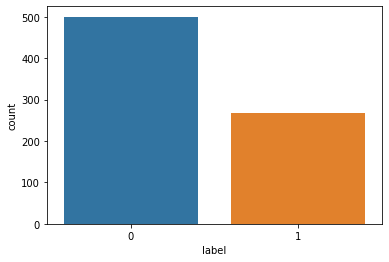

In [13]:
import seaborn as sns
ax = sns.countplot(x="label", data=patients) # Without vs with Diabetes

In [14]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = patients[feature_cols] # Features
y = patients.label # Target variable

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.25, random_state=25)

In [16]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter=5000)

# fit the model with data
logreg.fit(X_train,y_train)


y_pred = logreg.predict(X_test)

In [17]:
X_test

,pregnant,insulin,bmi,age,glucose,bp,pedigree
459,9,60,25.9,81,134,74,0.460
39,4,207,37.1,56,111,72,1.390
344,8,0,36.8,57,95,72,0.485
84,5,0,48.8,37,137,108,0.227
700,2,200,35.9,26,122,76,0.483
...,...,...,...,...,...,...,...
669,9,100,30.9,45,154,78,0.164
120,0,100,53.2,25,162,76,0.759
119,4,51,23.2,21,99,76,0.223
582,12,0,26.5,62,121,78,0.259


In [18]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.78125


# Lets plot the logit curve

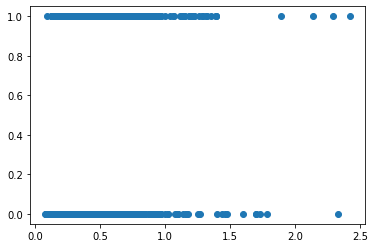

In [31]:
import matplotlib.pyplot as plt
plt.scatter(X['pedigree'],y)
plt.show()

# This might seem like a bad candidate for logistic regression... 

Most samples cluster on the left, with or without diabetes.

But consider that most people do not get diabetes, even if their parents have it.

[]

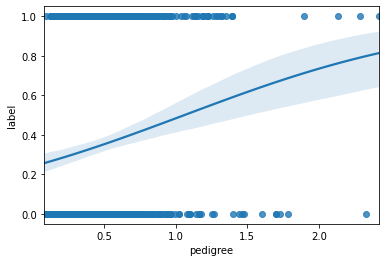

In [30]:
import seaborn as sns
sns.regplot(x = "pedigree", y = "label", data=patients, logistic = True)
plt.plot()

# Coefficients are the learned weights applied to the model. 

### You can access them and print them out.

Text(0.5, 0, 'Importance')

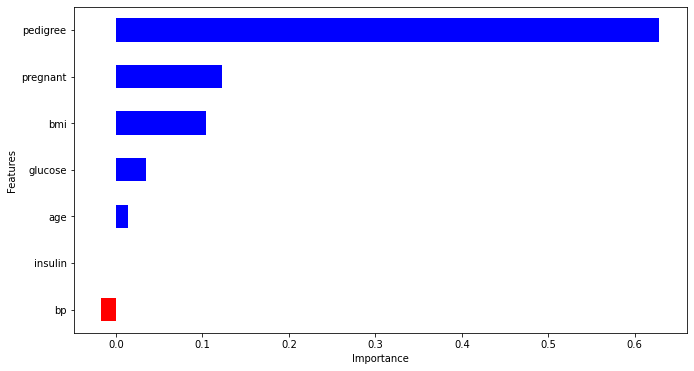

In [25]:
from matplotlib import pyplot as plt
coeff = list(logreg.coef_[0])
labels = list(X_train.columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

Glucose level, BMI, pregnancies and diabetes pedigree function have significant influence on the model, specially glucose level and BMI. 

Blood pressure has a negative influence on the prediction, i.e. higher blood pressure is correlated with a person not being diabetic. (also, note that blood pressure is more important as a feature than age, because the magnitude is higher for blood pressure).

## When you think about it... a train Logistic Regression model is the just coefficients, or weights. The algorithm remains the same.